In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [320]:
#import data set
train = pd.read_csv('train_assessment.csv')
test = pd.read_csv('test_assessment.csv')

# Part 1: Explanatory Data Analysis

In [291]:
#to see the shape of our training data
train.shape[0]

2100

In [292]:
train.shape[1]

19

In [ ]:
#the train data set have 2100 examples with 19 attributes

In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   expert_opinion  2100 non-null   int64  
 1   white           2100 non-null   object 
 2   green           2100 non-null   int64  
 3   brown           1761 non-null   float64
 4   purple          1724 non-null   float64
 5   black           1424 non-null   float64
 6   blue            1761 non-null   float64
 7   pink            1761 non-null   float64
 8   violet          1761 non-null   float64
 9   warm_white      1757 non-null   float64
 10  red             1757 non-null   float64
 11  orange          1757 non-null   float64
 12  lime            1761 non-null   float64
 13  navy            1761 non-null   float64
 14  magenta         1761 non-null   float64
 15  gray            1545 non-null   float64
 16  mint            1757 non-null   float64
 17  coral           1757 non-null   f

Here we can see that twoo attribute are categorical variabls and res
of the variavle are numerical attributes.

In [294]:
#to see the head of train dataset
train.head()

expert_opinion                    white  green         brown        purple  \
0               0                   sp_zoo   1000  2.355746e+16 -9.801258e+15   
1               0           sp_komandytowa    853  1.022268e+13 -2.122440e+14   
2               1  dzialalnosc_gospodarcza    333  2.903307e+13  6.184523e+13   
3               1  dzialalnosc_gospodarcza   1549  1.231991e+15 -1.420818e+15   
4               0  dzialalnosc_gospodarcza    388  6.386786e+14 -1.344810e+15   

         black      blue      pink        violet    warm_white           red  \
0     0.000456  0.014385  0.000007  2.477787e+14  1.864863e+10 -8.667254e+14   
1     0.093995  0.010588  0.000999  1.880886e+14  8.548080e+10  0.000000e+00   
2  4594.389366  0.001103  5.067338  4.572419e+12  0.000000e+00 -7.729770e+11   
3     0.000990  0.014826  0.000015 -5.759893e+13  1.860714e+09 -2.063383e+14   
4     0.014240  0.009785  0.000141 -9.862662e+12  1.000000e+04 -4.789872e+13   

   orange  lime      navy  magenta          gray          mint         coral  \
0    16.0   0.0  0.513611      0.0  0.000000e+00 -3.908423e+13 -4.683363e+13   
1     1.0   0.0  0.005625      0.0  0.000000e+00 -3.912383e+11 -8.179731e+10   
2     1.0   0.0  0.000000      0.0  0.000000e+00  0.000000e+00  0.000000e+00   
3     9.0   0.0  0.000069      0.0  1.839127e+15 -4.674909e+14 -1.893756e+12   
4    16.0   0.0  0.000000      0.0           NaN  8.820634e+12  0.000000e+00   

  beige  
0     C  
1     C  
2     E  
3     E  
4     C

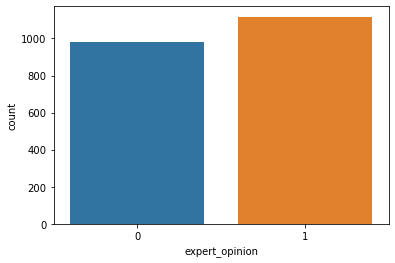

In [299]:
sns.countplot(train['expert_opinion'])
#here expert-opinion is our target attrubutes.

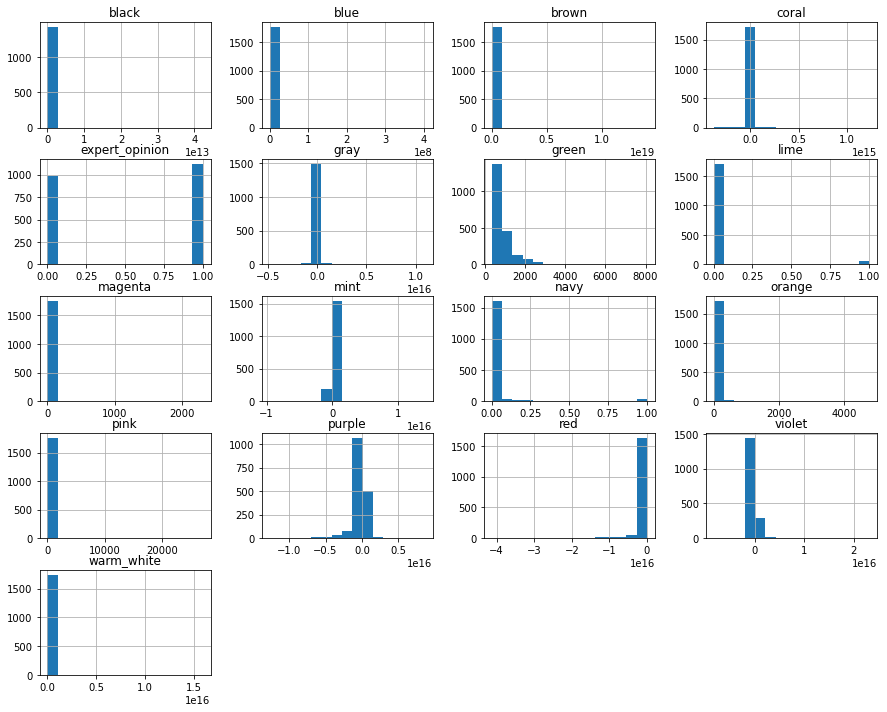

In [295]:
train.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
#From this histogram, we can see that data is not normally distributed

In [296]:
#checking the missing value of train data
train.isnull().sum()


expert_opinion      0
white               0
green               0
brown             339
purple            376
black             676
blue              339
pink              339
violet            339
warm_white        343
red               343
orange            343
lime              339
navy              339
magenta           339
gray              555
mint              343
coral             343
beige               0
dtype: int64

In [297]:
#checking the missing value of test data
test.isnull().sum()

expert_opinion      0
white               0
green               0
brown              78
purple             88
black             159
blue               78
pink               78
violet             78
warm_white         83
red                83
orange             83
lime               78
navy               78
magenta            78
gray              178
mint               83
coral              83
beige               0
dtype: int64

In [33]:
#to see the data types
train.dtypes.value_counts()

float64    15
int64       2
object      2
dtype: int64

In [34]:
#to see the data types
test.dtypes.value_counts()

float64    15
int64       2
object      2
dtype: int64

In [321]:
#filling missing value 
train.fillna(train.median(), inplace=True)
test.fillna(train.median(), inplace=True)

We have lot of missing valuee. If we drop the  observation which has
missing value, it might decrease our model accuracy.
So, that's why I just filled the missing  values with median of the attributes.
I could use other approaches; for example, cosidaring the mean of attributes, Machine learning approach(e.g, KNN imputation).Our data is not normally distributed.So, I did
not use mean(). I Used only median() to fill up.

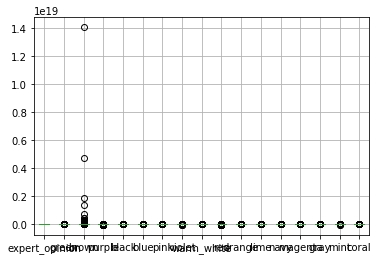

In [36]:
#to check the outliers of our training data
train.boxplot()

This chart is not so clear to check the outliers. I will take a look separately for some of  attributes to  get idea of outliers.

In [249]:
#we can get a idea from this chart as well. Here, we can  understand distribution of  data. Like mean,
#median, std, quantiles etc.
train.describe()

expert_opinion        green         brown        purple         black  \
count     2100.000000  2100.000000  2.100000e+03  2.100000e+03  2.100000e+03   
mean         0.531905   829.804286  1.591236e+16 -1.554441e+14  2.163349e+10   
std          0.499100   578.302479  3.291706e+17  1.127393e+15  9.234966e+11   
min          0.000000   324.000000  9.370240e+05 -1.267966e+16  3.750117e-07   
25%          0.000000   445.000000  4.867840e+13  6.482129e+12  7.234965e-01   
50%          1.000000   648.000000  2.457546e+14  3.645189e+13  1.339756e+01   
75%          1.000000  1000.000000  1.090044e+15  9.641899e+13  2.862328e+02   
max          1.000000  8068.000000  1.406204e+19  8.618625e+15  4.225000e+13   

               blue          pink        violet    warm_white           red  \
count  2.100000e+03  2.100000e+03  2.100000e+03  2.100000e+03  2.100000e+03   
mean   1.915547e+05  1.698906e+01  9.746979e+13  4.251339e+13 -6.837102e+14   
std    8.778137e+06  6.043429e+02  1.004606e+15  4.878155e+14  2.819058e+15   
min    0.000000e+00  3.496900e-12 -8.228304e+15  0.000000e+00 -4.137805e+16   
25%    7.756300e-10  1.878749e-05 -1.512973e+12  0.000000e+00 -1.398885e+14   
50%    8.959645e-07  1.392145e-04  0.000000e+00  0.000000e+00 -1.813865e+13   
75%    9.788727e-05  7.712481e-04  1.889012e+13  1.107353e+10 -8.034891e+11   
max    4.022648e+08  2.702195e+04  2.302793e+16  1.593272e+16  0.000000e+00   

            orange         lime         navy      magenta          gray  \
count  2100.000000  2100.000000  2100.000000  2100.000000  2.100000e+03   
mean     28.081429     0.030476     0.036666     5.102381  5.349097e+12   
std     150.148875     0.171934     0.155000    66.266641  4.743638e+14   
min       0.000000     0.000000     0.000000     0.000000 -4.815584e+15   
25%       1.000000     0.000000     0.000000     0.000000  0.000000e+00   
50%       4.000000     0.000000     0.000000     0.000000  0.000000e+00   
75%       9.000000     0.000000     0.000000     0.000000  0.000000e+00   
max    4761.000000     1.000000     1.000000  2304.000000  1.093025e+16   

               mint         coral  
count  2.100000e+03  2.100000e+03  
mean  -3.406257e+13  1.091178e+12  
std    5.417674e+14  5.310188e+13  
min   -9.566910e+15 -3.793380e+14  
25%   -4.999814e+12  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  
max    1.407513e+16  1.228204e+15

In [44]:
test.describe()

expert_opinion        green         brown        purple         black  \
count      496.000000   496.000000  4.960000e+02  4.960000e+02  4.960000e+02   
mean         0.516129   854.590726  4.619773e+15 -1.854158e+13  2.302365e+08   
std          0.500244   565.749814  2.791904e+16  2.641332e+14  3.849395e+09   
min          0.000000   361.000000  6.250000e+08 -1.436244e+15  4.051340e-05   
25%          0.000000   461.000000  6.095880e+13  3.925157e+12  2.904317e+00   
50%          1.000000   617.000000  2.457546e+14  2.752894e+13  1.339756e+01   
75%          1.000000   986.000000  1.119109e+15  3.936350e+13  3.334457e+03   
max          1.000000  3610.000000  5.325811e+17  1.640259e+15  8.506944e+10   

               blue          pink        violet    warm_white           red  \
count  4.960000e+02  4.960000e+02  4.960000e+02  4.960000e+02  4.960000e+02   
mean   4.456070e-02  1.584699e+00  5.658462e+13  1.671898e+13 -1.958977e+14   
std    6.899108e-01  3.415252e+01  4.784891e+14  1.280446e+14  6.610525e+14   
min    0.000000e+00  5.476000e-09 -2.189689e+15  0.000000e+00 -5.071058e+15   
25%    4.553418e-11  3.653993e-05 -1.320038e+12  0.000000e+00 -4.412276e+13   
50%    8.959645e-07  1.392145e-04  0.000000e+00  0.000000e+00 -1.573588e+13   
75%    2.136416e-05  1.052437e-03  3.985865e+12  3.084701e+09 -1.881387e+11   
max    1.332476e+01  7.605949e+02  4.962632e+15  2.013868e+15  0.000000e+00   

            orange        lime        navy      magenta          gray  \
count   496.000000  496.000000  496.000000   496.000000  4.960000e+02   
mean     23.026210    0.040323    0.050620     8.114919 -6.769252e+12   
std     116.131645    0.196913    0.196678   178.209447  1.076376e+14   
min       0.000000    0.000000    0.000000     0.000000 -9.448156e+14   
25%       1.000000    0.000000    0.000000     0.000000  0.000000e+00   
50%       4.000000    0.000000    0.000000     0.000000  0.000000e+00   
75%       9.000000    0.000000    0.000000     0.000000  0.000000e+00   
max    1936.000000    1.000000    1.000000  3969.000000  1.059031e+15   

               mint         coral  
count  4.960000e+02  4.960000e+02  
mean  -5.283445e+12 -6.369205e+11  
std    6.867508e+13  7.702460e+12  
min   -3.145671e+14 -9.601683e+13  
25%   -1.531490e+12  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  
max    1.207386e+15  5.969089e+13

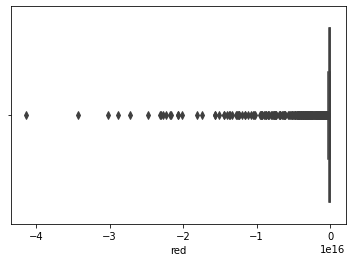

In [37]:
sns.boxplot(train['red'])

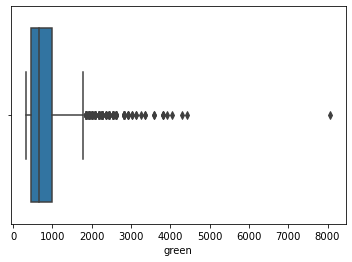

In [38]:
sns.boxplot(train['green'])

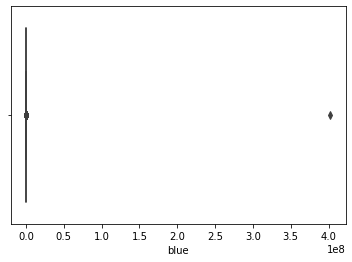

In [39]:
sns.boxplot(train['blue'])

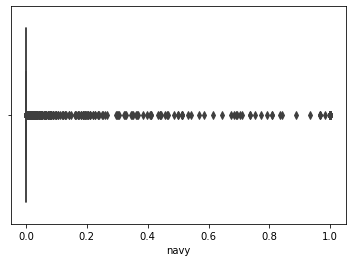

In [40]:
sns.boxplot(train['navy'])

I have checked for the couples of attributes to detect the outliers.I am seeing that mostly all attributes have outliers. 
So, this would not be a good decison to remove the outlier. If we  remove the outliers, we will remove all of the observations. So, removing outlier is worthless for this task.

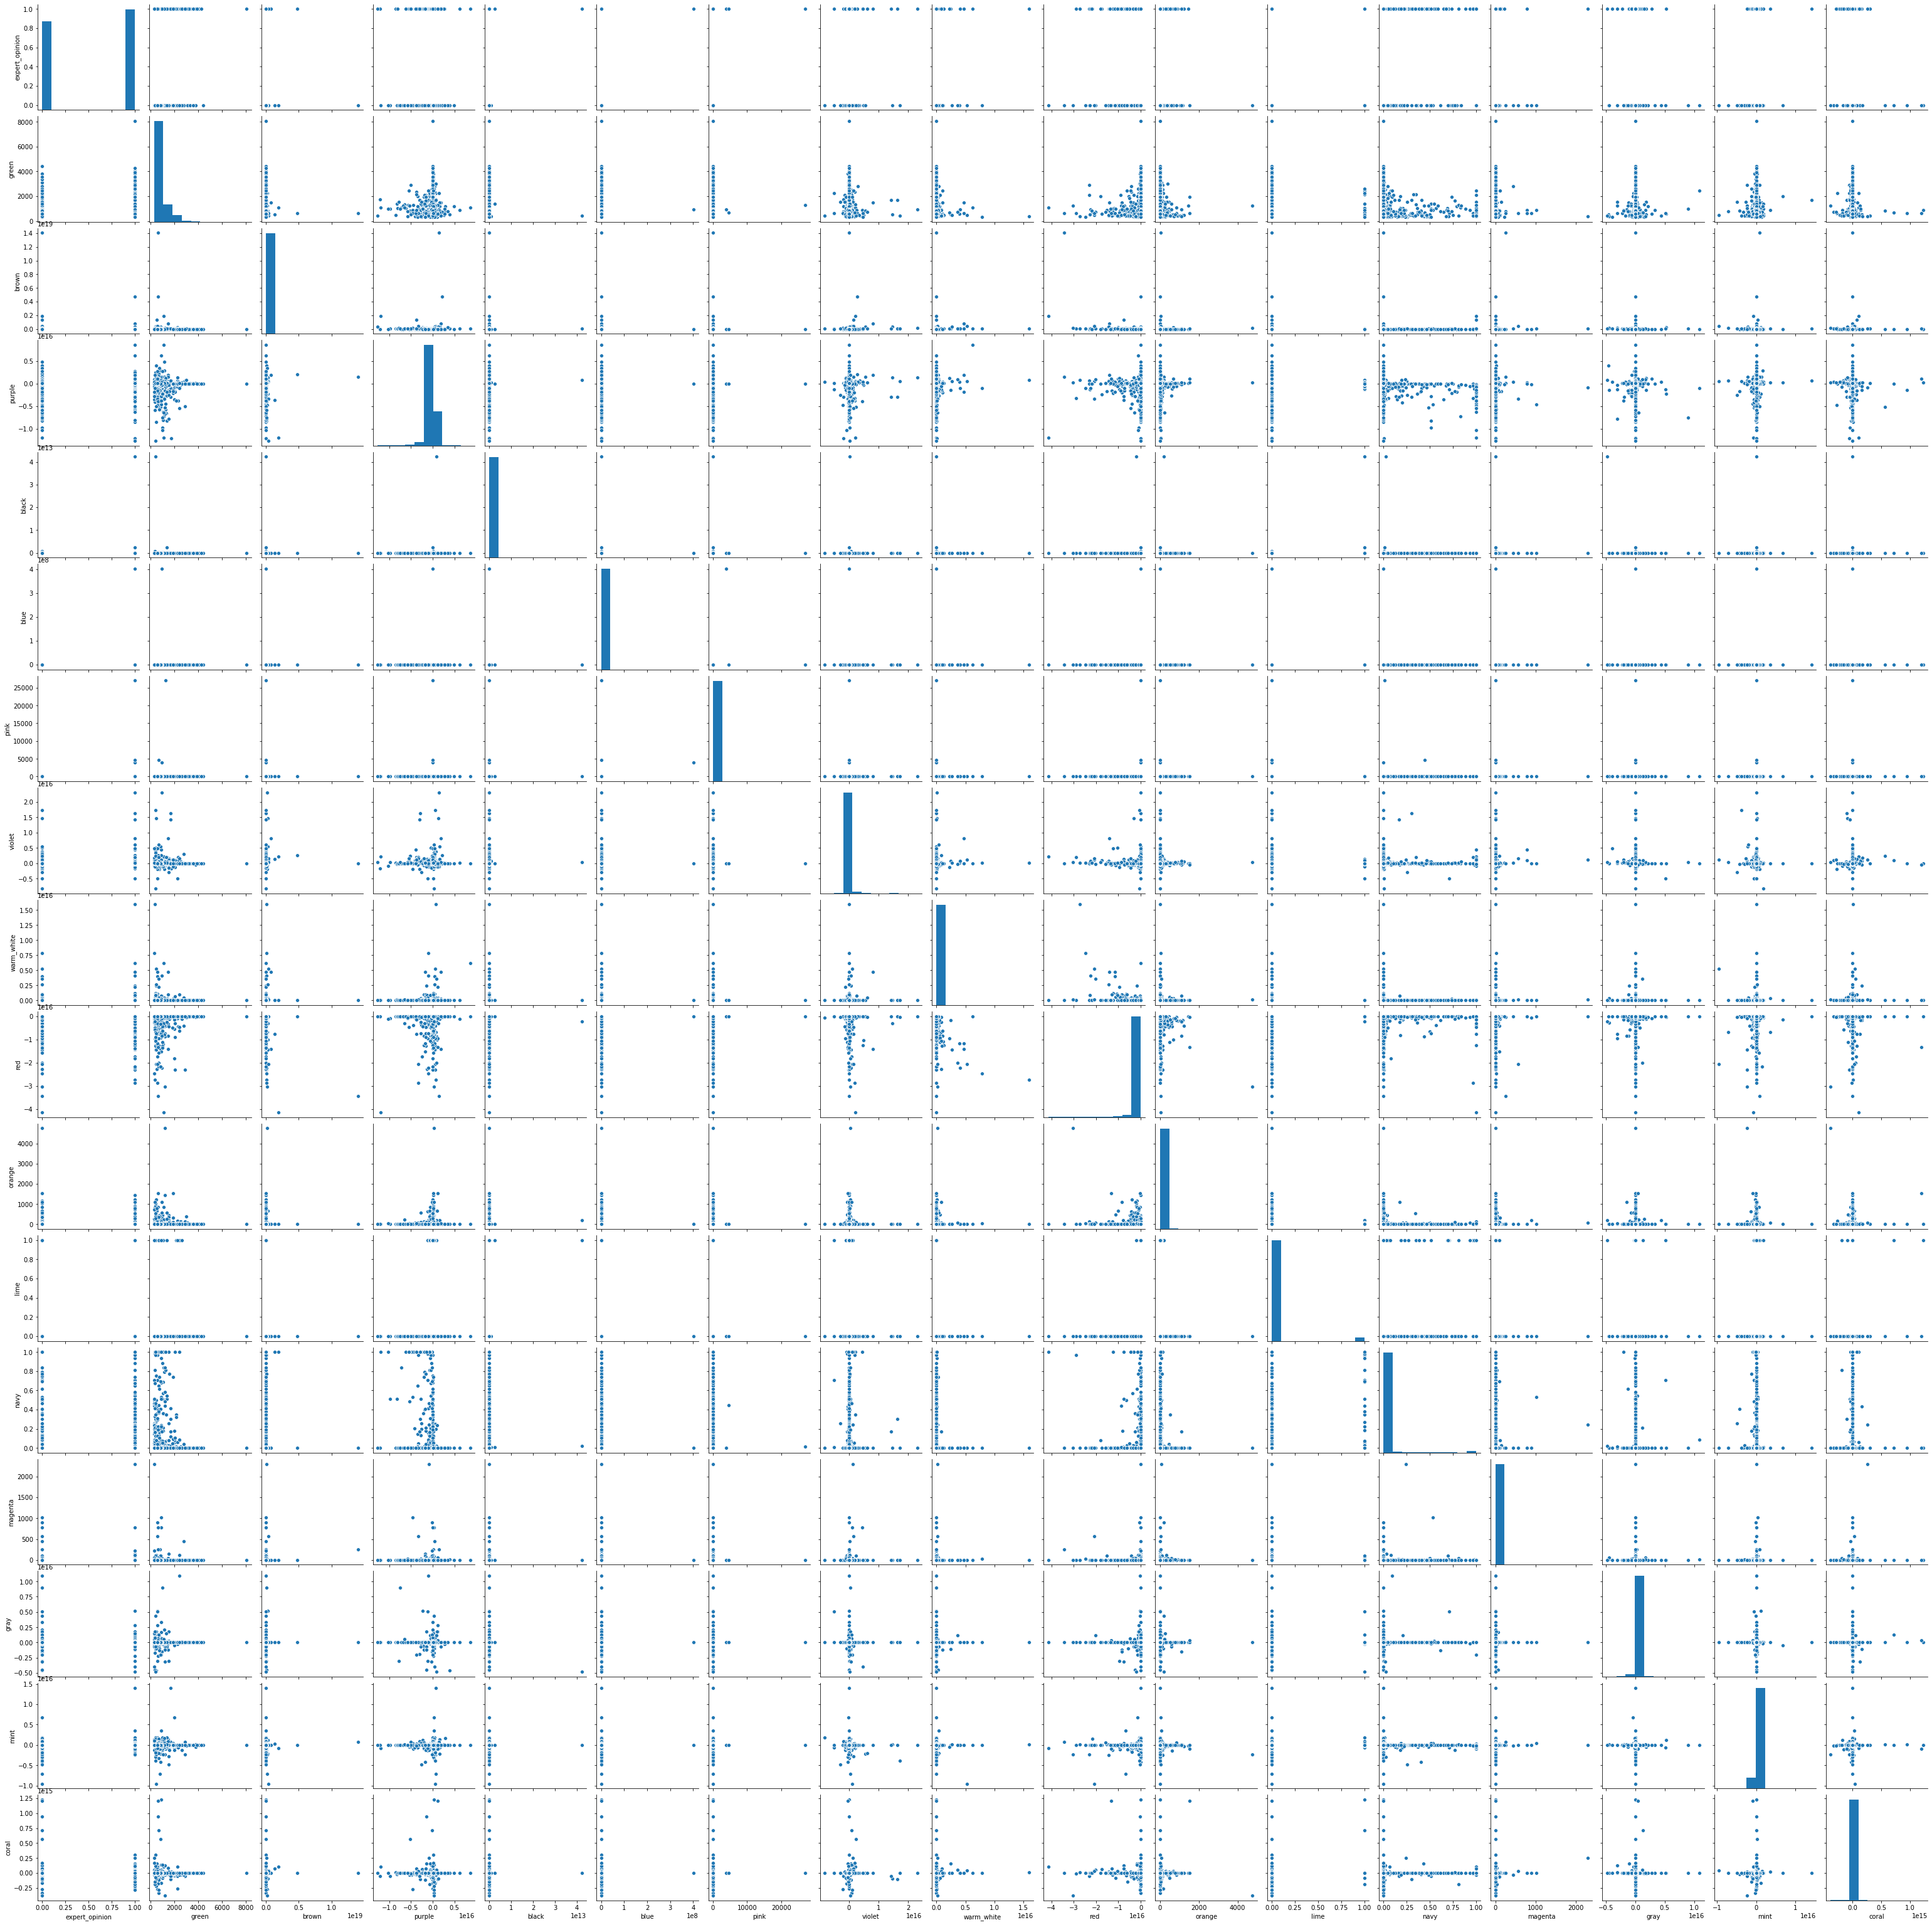

In [41]:
sns.pairplot(train)

This is the pairplot which draw the scatter plots for all possible combination of our dataset attributes.As, we have a little bit more
attributes, this is not easliy interpretable.I am not seeing any highly co-related feature here. But, to be more sure I will draw a cur()
plot in the next step as well.

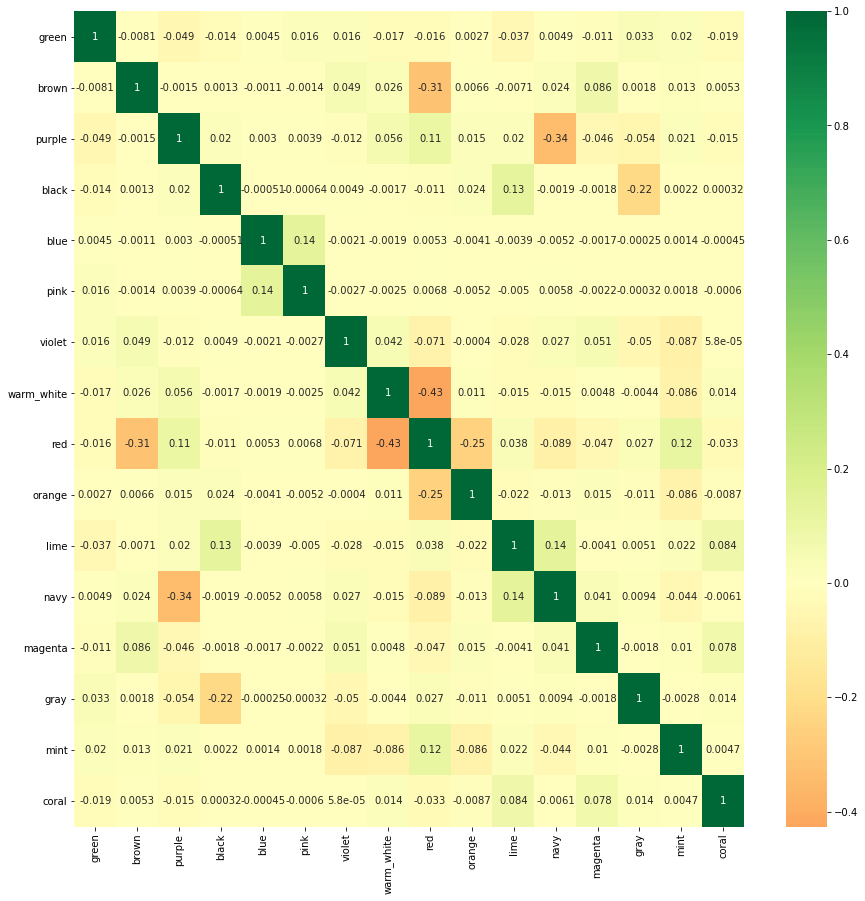

In [78]:
plt.figure(figsize=(15,15))
p=sns.heatmap(X_train.corr(), annot=True,cmap='RdYlGn',center=0)

From this  cor() plot we can also see that co-relation between independent 
variable not so clear. We are not seeing variables are highly co-related 
with each other. Except for some variables.

# Part 2: Feature Engineering

In [310]:
data_train=train # I am making  copy of my entire dataset to encode the catagorical values.
data_test=test

In [311]:
ord_enc = OrdinalEncoder()
data_train["white_code"] = ord_enc.fit_transform(data_train[["white"]])
data_train["beige_code"] = ord_enc.fit_transform(data_train[["beige"]])
data_test["white_code"] = ord_enc.fit_transform(data_test[["white"]])
data_test["beige_code"] = ord_enc.fit_transform(data_test[["beige"]])
X_train_encoded= data_train.drop(['expert_opinion','white', 'beige'], axis=1)#train data after encoding
y_train_encoded= data_train['expert_opinion']
X_test_encoded= data_test.drop(['expert_opinion','white', 'beige'], axis=1) #test data after encoding
y_test_encoded= data_train['expert_opinion']

In [312]:
X_train_encoded.head()

green         brown        purple        black      blue      pink  \
0   1000  2.355746e+16 -9.801258e+15     0.000456  0.014385  0.000007   
1    853  1.022268e+13 -2.122440e+14     0.093995  0.010588  0.000999   
2    333  2.903307e+13  6.184523e+13  4594.389366  0.001103  5.067338   
3   1549  1.231991e+15 -1.420818e+15     0.000990  0.014826  0.000015   
4    388  6.386786e+14 -1.344810e+15     0.014240  0.009785  0.000141   

         violet    warm_white           red  orange  lime      navy  magenta  \
0  2.477787e+14  1.864863e+10 -8.667254e+14    16.0   0.0  0.513611      0.0   
1  1.880886e+14  8.548080e+10  0.000000e+00     1.0   0.0  0.005625      0.0   
2  4.572419e+12  0.000000e+00 -7.729770e+11     1.0   0.0  0.000000      0.0   
3 -5.759893e+13  1.860714e+09 -2.063383e+14     9.0   0.0  0.000069      0.0   
4 -9.862662e+12  1.000000e+04 -4.789872e+13    16.0   0.0  0.000000      0.0   

           gray          mint         coral  white_code  beige_code  
0  0.000000e+00 -3.908423e+13 -4.683363e+13         6.0         0.0  
1  0.000000e+00 -3.912383e+11 -8.179731e+10         5.0         0.0  
2  0.000000e+00  0.000000e+00  0.000000e+00         0.0         1.0  
3  1.839127e+15 -4.674909e+14 -1.893756e+12         0.0         1.0  
4  0.000000e+00  8.820634e+12  0.000000e+00         0.0         0.0

In [313]:
#here white attribute is encoded  into 0 to 5, as white attribute contain six different values.
#Similarly, beige attributed is encoded into 0 and 1, as this has only two catagorical values.

In [314]:
y_train_encoded.head()

0    0
1    0
2    1
3    1
4    0
Name: expert_opinion, dtype: int64

In [315]:
# Fitting  Model withy out any level encoding for the catagorical values
#and removing the catgorical attributes

In [325]:
X_train= train.drop(['expert_opinion','white', 'beige'], axis=1)
y_train= train['expert_opinion']
X_test= test.drop(['expert_opinion','white', 'beige'], axis=1)
y_test= test['expert_opinion']

# Part 3: Modeling

Based on explanatory data analysis, we can easily understand that this is a classification problem.
As this is a classification problem, we will use some supervised technique to solve this problem; for 
example decosion tree, knn,
randomforest. At last, i will try to implemant a small neural network.

## 3.1 Random Forest

In [328]:
#Create a Gaussian Classifier
def ml(x_train,y_train,x_test,y_test,model):
    #clf=RandomForestClassifier()

#Train the model 
    model.fit(x_train,y_train)

    y_pred=clf.predict(x_test)    
# Model Accuracy
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Accuracy on test Data
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Accuracy: 0.5866935483870968
Predicted    0    1
Actual             
0          117  123
1           82  174


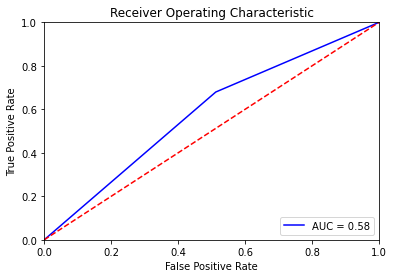

In [329]:
clf=RandomForestClassifier()
ml(X_train,y_train,X_test,y_test,clf) # result without encoding the catagorical values.

 

Accuracy: 0.5141129032258065
Predicted    0    1
Actual             
0          133  107
1          134  122


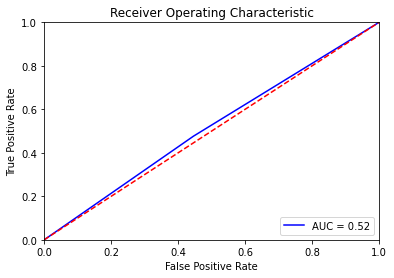

In [330]:
ml(X_train_encoded,y_train,X_test_encoded,y_test,clf) #with encoding of catagorical values.

Here, we are not seeing any improvement after encoding as well. Befor encoding, AUC was 58 but, after encoding AUC is 0.52. 
In the next step, I  will  apply all technique without encoding of our catagorical values.

Hyper Parameter optimaization using using RandomaizedSearCV

In [331]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [332]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [333]:
rf_random.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 266, 483, 700, 916,
                                                         1133, 1350, 1566, 1783,
                                                         2000]},
                   random_state=42, verbose=2)

In [334]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=1566)

In [335]:
y_pred=rf_random.predict(X_test)

Accuracy: 0.5766129032258065
Predicted   0    1
Actual            
0          85  155
1          55  201


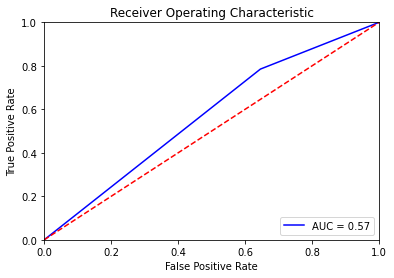

In [336]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Accuracy on test data
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After, tuning some parameters, we get accuracy which is mostly similar as default setting.If we do tuning with a large number
of parameter we might get a good accuracy.

## 3.2 Decision Tree

Accuracy: 0.5040322580645161
Predicted    0    1
Actual             
0          114  126
1          120  136


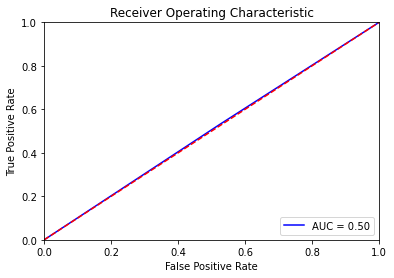

In [262]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Accuracy on test data
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Here, we are getting only 50% accuracy which is poor than random forest.

In [ ]:
#Some hyperparameter optimaization
clf = DecisionTreeClassifier()
param_dict={'criterion':['gini','entropy'],
            'max_depth':range(1,10),
            'min_samples_leaf':range(1,5)}
grid_decisiontree = GridSearchCV(clf, param_dict, cv=10,n_jobs=1, verbose = 3)

In [264]:
grid_decisiontree

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5)},
             verbose=3)

In [265]:
# fitting the model for grid search
grid_decisiontree.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, score=0.552, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, score=0.571, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, score=0.524, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, score=0.519, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, score=0.533, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, score=0.557, total=   0.0s
[CV] criterion=gini

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, score=0.557, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, score=0.538, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, score=0.567, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, score=0.614, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4 .................
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, score=0.600, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, score=0.552, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1 .................
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, score=0.552, total=   0.0s


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    7.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5)},
             verbose=3)

In [267]:
print(grid_decisiontree.best_params_)
y_pred = grid_decisiontree.predict(X_test)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}


Accuracy: 0.5665322580645161
Predicted   0    1
Actual            
0          66  174
1          41  215


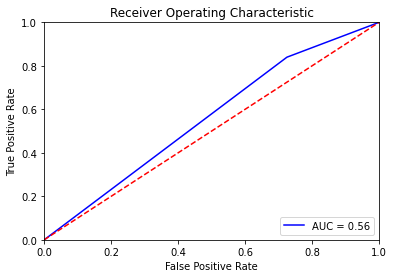

In [268]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

  Here we can see that after doing hyper paramter optimaization  for some parameter, we get some  improvement here. Maybe. if we make
optimaization for range of parameter we might get a  good accuracy.

# # 3.3 KNN

Accuracy: 0.5443548387096774
Predicted    0    1
Actual             
0          102  138
1           88  168


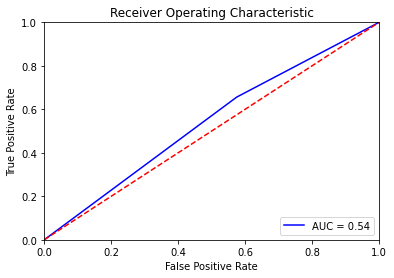

In [276]:
model = KNeighborsClassifier(n_neighbors=19)
# Train the model using the training sets
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

My laptop GPU is not so high, thats why I did not try to optimaize here. I could optimaize here leaf_size, p, n_neighbors
these attributes.Maybe, I could get   a good accuracy and roc .

## 3.4 KNN with PCA

In [277]:
#Trying with PCA

In [278]:
X_train_normalise=preprocessing.normalize(X_train) # normalize the train and test data
X_test_normalise=preprocessing.normalize(X_test)

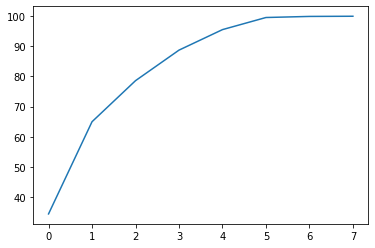

In [279]:
pca = PCA(n_components=8)
pca.fit(X_train_normalise)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

From this graphs we can see mainly two elbow one is at 1 and another is at 5.We can, choose first five principal components as
its explain almost  95 variance of our original datasets. But, I used here 12, because I have seen that If use 12 I get better result
than 5.

In [280]:
pca = PCA(n_components=12)
X_train_pca= pca.fit_transform(X_train_normalise)
X_test_pca= pca.fit_transform(X_test_normalise)


Accuracy: 0.530241935483871
Predicted   0    1
Actual            
0          70  170
1          63  193


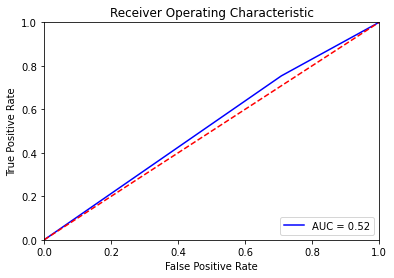

In [281]:
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Even, after implementing, we are not getting  good accuracy.Here, pca is not giving good performance.

## 3.5 Artificial Neural Network(ANN)

Tying With ANN

In [337]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

Sequential model to initialise our ann and dense module to build the layers


In [345]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)




210/210 [==============================] - 1s 1ms/step - loss: 0.6576 - accuracy: 0.5933
Train score: 0.6576150059700012
Train accuracy: 0.5933333039283752
********************
50/50 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5323
Test score: 0.6912969350814819
Test accuracy: 0.5322580933570862


Text(0.5, 15.0, 'Predicted label')

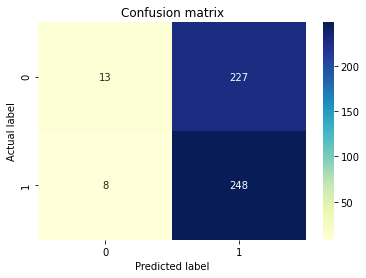

In [349]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')  #confusion matrix using seaboran
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

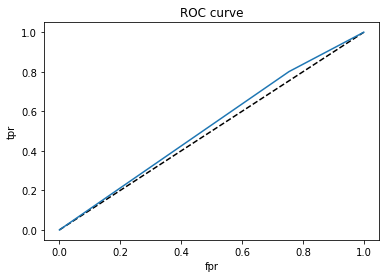

In [350]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

From this graph we can see that, this ROC curve shows that this is not giving good performance over random forest and decision tree.

In [351]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [16, 32],
              'epochs': [50,100],
              'optimizer': ['adam', 'rmsprop','SGD']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\49157\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [128]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}
Best Accuracy after tuning: 0.5480952380952381


Here, we can see that only 54% accuracy on training data, which is really poor. In ANN, there are a lot parameter, like number of hidden
layer , optimaization fuction, epoch, batch size, number of neuro etc, if do optimaization for more parameter with a large range
maybe we can get a good accuracy.

# part 4: Final model selection

From all of the models which  I have tried, I can see that random forest give the best result.I have got 58% accuracy. Although this
is not good result, random forest perform better over other approach.If we do more quality checking of our dataset, and do more hyper-
parameter optimaization, we will get more better result.


One thing that I did not try, I could use Auto ML technique to see which model perform better. And, I could know better about
all feautre of the dataset which are important for the model. If I get opportunity to work on this dataset again, I will try best 
to improve the accuracy.